In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import copy

In [2]:
class ML():
    def __init__(self):
        # 位置xの範囲を指定
        self.x = np.arange(0, 11, 1)
        
        # ドアの位置を指定
        self.door = [2, 4, 9]
        
        # 観測の成功率と失敗率を指定（状態はドアの有無の二つとする）
        self.o_suc = 0.8
        self.o_fail = 0.2
        
        # 移動の成功率と失敗率を指定
        self.m_suc = 0.8
        self.m_fail = 1 - self.m_suc
        
        # 初期信念を一様分布とする
        self.bel_x = [[1/len(self.x) for i in self.x]]
    
    def draw(self, t):
        # 描画する時刻を取得
        self.t = t
        
        # 計算する
        self.calc()
        
        # 新しい描画を開始
        plt.figure()
        
        # ここから一つ目のグラフの描画設定
        plt.subplot(211)
        
        # 範囲の指定
        plt.ylim(0, 2)
        plt.xlim(self.x[0] - 0.5, self.x[-1] + 0.5)

        # ドアの描画
        for i in self.door:
            plt.scatter(i, 0.25, marker='s', s=500, c='orange', edgecolors="gray")
        
        # ロボットの描画
        plt.scatter(self.t, 0.25, marker='o', s = 500, c='lightblue', edgecolors="gray")
        
        # ここから二つ目のグラフの描画設定
        plt.subplot(212)
        
        # 範囲の指定
        plt.ylim(0, 1)
        plt.xlim(self.x[0] - 0.5, self.x[-1] + 0.5)
        
        # 確率分布の描画
        for i in self.x:
            plt.scatter(i, self.bel_x[self.t][i], marker='o', s = 10, c='red', edgecolors="red")
        
    def calc(self):
        
        for i in self.x:
            if i == 0:
                # 使用するリストの準備
                pos = [0 for i in self.x]
                pssa = [0 for i in self.x]
                bel_xg = [0 for i in self.x]
                bel_xn = [0 for i in self.x]
                bel_xb = list(self.bel_x[0])
                
            else:
                # 移動
                for j in self.x:
                    # 壁を想定する時の計算（壁の想定については、まだ作っていません。）
                    # if j == 1:
                    #     pssa[j] = self.m_fail * bel_xb[j]
                    # elif j == len(self.x) - 1:
                    #     pssa[j] = (self.m_suc * bel_xb[j-1]) + bel_xb[j]
                    # else:
                    #     pssa[j] = (self.m_suc * bel_xb[j-1]) + (self.m_fail * bel_xb[j])
                    
                    # 壁を想定しない時の計算
                    pssa[j] = (self.m_suc * bel_xb[j-1]) + (self.m_fail * bel_xb[j])
                
                # 観測
                if i in self.door:    # ドアを見つけたときの計算
                    for j in self.x:
                        if j in self.door:
                            pos[j] = self.o_suc
                        else:
                            pos[j] = self.o_fail
                    
                else:                 # ドアが見つからない時の計算
                    for j in self.x:
                        if j in self.door:
                            pos[j] = self.o_fail
                        else:
                            pos[j] = self.o_suc
            
                # 移動と観測の情報統合
                for i in self.x:
                    bel_xg[i] = pos[i] * pssa[i]

                # 正規化
                for i in self.x:
                    bel_xn[i] = bel_xg[i] / sum(bel_xg)
                
                # 現在の信念を記録
                bel_xb = list(bel_xn)
                
                # 信念を一つのリストにまとめて保存
                self.bel_x.append(bel_xb)

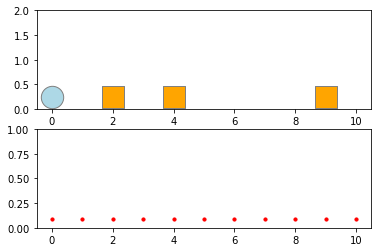

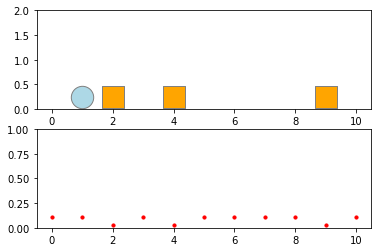

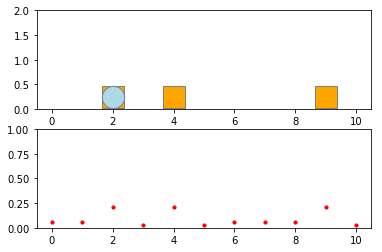

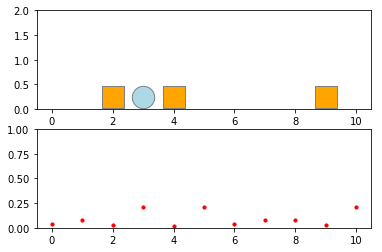

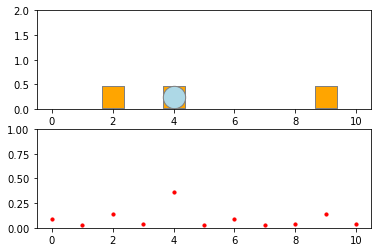

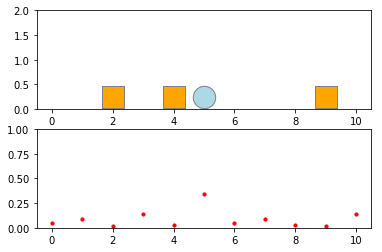

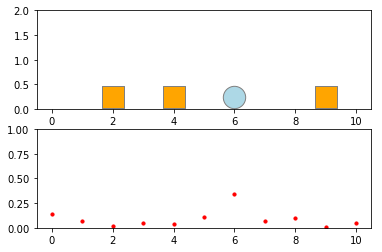

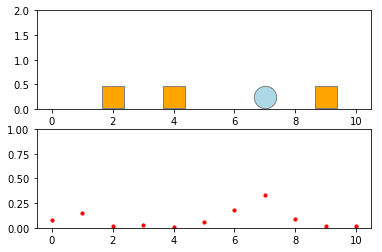

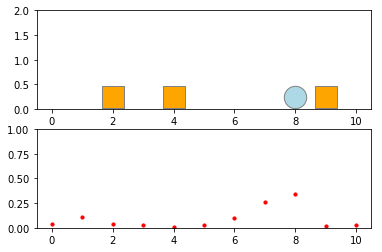

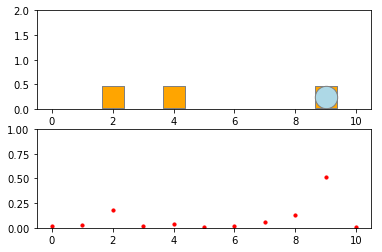

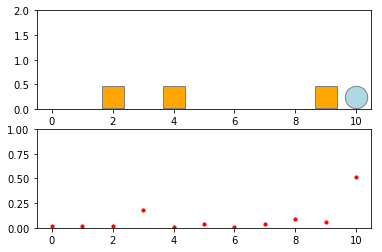

In [3]:
if __name__ == '__main__':
    m1 = ML()
    for i in m1.x:
        m1.draw(i)